In [1]:
import numpy as np
from harfe import harfe
from harfe.utils import *
import matplotlib.pyplot as plt


### Define Target functions

In [2]:
def target_func(X): 
    return 10*np.sin(np.pi*X[:,0]*X[:,1]) + 20*(X[:,2]-0.5)**2 + 10*X[:,3] + 5*X[:,4]


### Define hyperparameters

In [3]:
num_data_train = 200                             # number of data points for training data set
num_data_val = 1000                              # number of data points for validation data set
num_data_tot = num_data_train + num_data_val     # total points

d = 10                                           # input dimension for target function
Nf = 10*num_data_train                           # number of features
q=2

mean = 0                                         # if adding noise then mean value
std = 1.0                                        # if adding noise then std value

act = 'sin'                                      # activation function: sine, tanh, or relu
Dict_type = 'SRF'                                # Dictionary type of the form sin(Wx + b)


### Build training and validation data 

In [4]:
X_train = np.random.uniform(0, 1, (num_data_train, d))
Y_train = target_func(X_train) 
X_val = np.random.uniform(0, 1, (num_data_val, d))
Y_val = target_func(X_val)


noise_train  = np.random.uniform(mean, std, (Y_train.shape[0]))
noise_val  = np.random.uniform(mean, std, (Y_val.shape[0]))
Y_train_noisy = Y_train + noise_train
Y_val_noisy = Y_val + noise_val


### Generate random weights and biases and build the random feature matrix.
### Apply HARFE algorithm to learnt the coefficients.

In [5]:
omega, bias = generate_omega_bias(rows = Nf, columns = d, weight = 1, par1 = -1, par2 = 1,
                                 distribution = 'norm-uni', bool_bias = True, sparsity = q)

A_train = feature_matrix(X_train, omega, bias,activation = act, dictType = Dict_type)
A_val = feature_matrix(X_val, omega, bias, activation = act,dictType = Dict_type)

scale_A = np.linalg.norm(A_train, axis = 0) 
A_train /= scale_A 
A_val /= scale_A

coeff, rel_error, iterations, _ = harfe(Y_train_noisy, A_train, s = 200, lam = 1e-3)

### Recover learnt function on validation set 

In [6]:
y_val_rec = np.matmul(A_val, coeff)

# Calculate the mean squared error on validation set
mse = np.linalg.norm(y_val_rec.reshape(-1) - Y_val)**2/num_data_val

print('Mean square error:', mse, '\nIterations required:', iterations)

Mean square error: 0.55271222625252 
Iterations required: 18


### Scatter plot of true values VS learnt values on validaton set

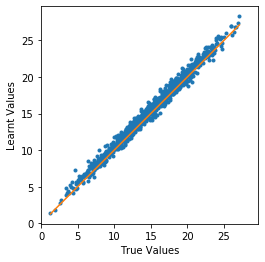

In [7]:
x = np.linspace(np.min(Y_val), np.max(Y_val), 1000)
plt.plot(Y_val, y_val_rec, '.')
plt.plot(x, x)
plt.ylabel('Learnt Values')
plt.xlabel('True Values')
plt.axis('square')
plt.show()